In [41]:
import sklearn
import numpy as np
import pandas as pd

housing = pd.read_csv("./datas/housing.csv")
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [42]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [43]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [44]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


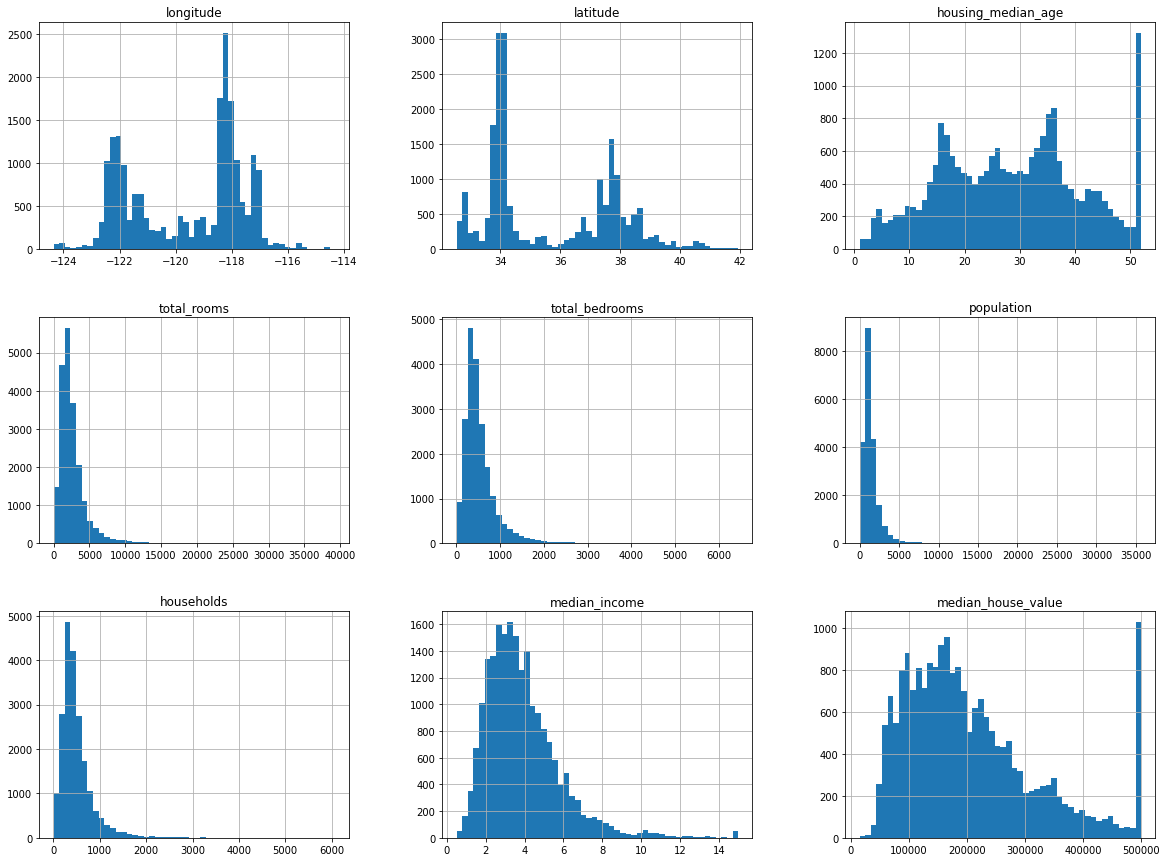

In [45]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15));

In [46]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=13)
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
2973,-119.08,35.34,15.0,1474.0,235.0,768.0,238.0,4.1528,130100.0,INLAND
14432,-117.23,32.80,21.0,2429.0,579.0,1011.0,538.0,3.2250,229400.0,NEAR OCEAN
13916,-116.15,34.14,18.0,3312.0,705.0,1251.0,512.0,3.0139,82600.0,INLAND
18848,-122.37,41.41,28.0,1729.0,419.0,929.0,370.0,1.2700,53100.0,INLAND
2208,-119.87,36.81,6.0,1891.0,341.0,969.0,330.0,4.6726,107800.0,INLAND


<AxesSubplot:>

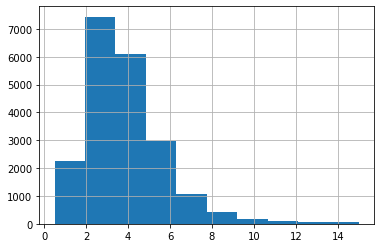

In [47]:
housing['median_income'].hist()

In [48]:
housing['income_cat'] = pd.cut(housing['median_income'], bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                              labels=[1, 2, 3, 4, 5])

In [49]:
housing['income_cat'].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

<AxesSubplot:>

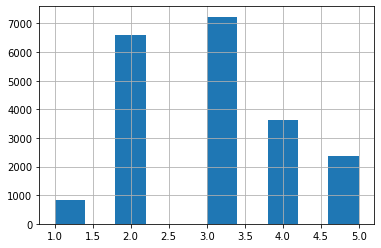

In [50]:
housing['income_cat'].hist()

In [51]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=13)
for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    stat_test_set = housing.loc[test_index]

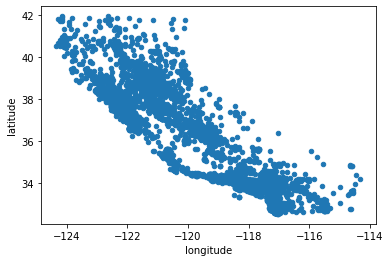

In [52]:
housing = strat_train_set.copy()
housing.plot(kind='scatter', x='longitude', y='latitude');

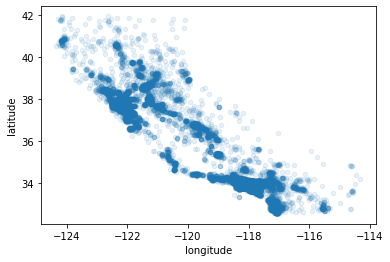

In [53]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1);

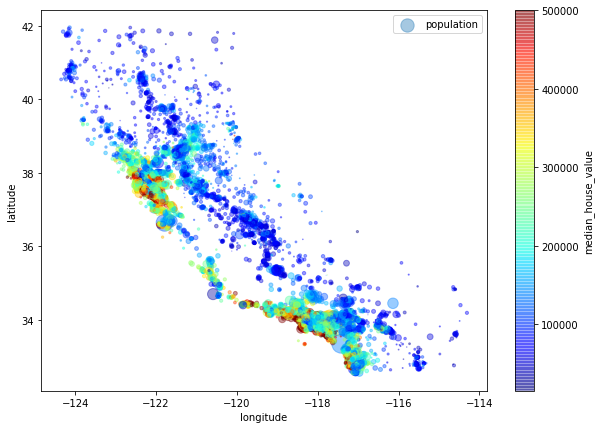

In [54]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4,
            s=housing['population']/100, label='population', figsize=(10,7),
            c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True, sharex=False)
plt.legend();

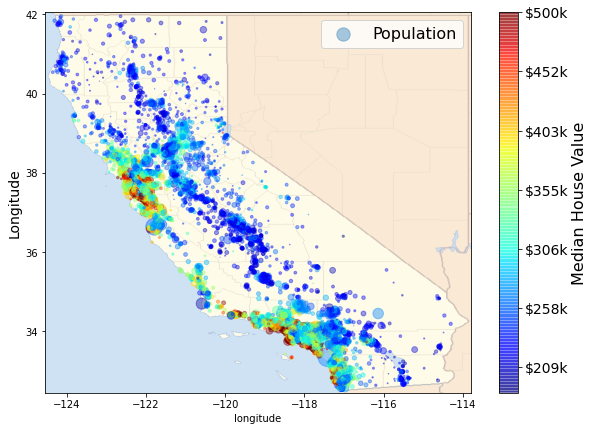

In [55]:
import matplotlib.image as mpimg
california_img = mpimg.imread("./datas/california.png")
ax = housing.plot(kind='scatter', x='longitude', y='latitude', figsize=(10,7),
                 s=housing['population']/100, label='Population',
                 c='median_house_value', cmap=plt.get_cmap('jet'),
                 colorbar=False, alpha=0.4)
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
          cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.ylabel("Longitude", fontsize=14)

prices = housing['median_house_value']
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar(ticks=tick_values/prices.max())
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16);

In [56]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.689000
total_rooms           0.137326
housing_median_age    0.100730
households            0.069638
total_bedrooms        0.054213
population           -0.022837
longitude            -0.041520
latitude             -0.147386
Name: median_house_value, dtype: float64

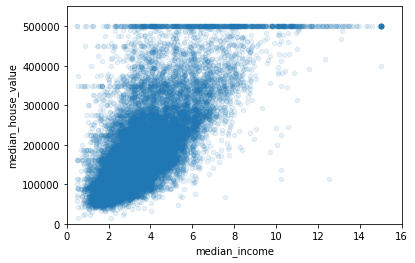

In [57]:
housing.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.1)
plt.axis([0, 16, 0, 550000]);

In [58]:
housing['rooms_per_household'] = housing['total_rooms']/housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms']
housing['population_per_household'] = housing['population']/housing['households']

In [59]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.689000
rooms_per_household         0.153984
total_rooms                 0.137326
housing_median_age          0.100730
households                  0.069638
total_bedrooms              0.054213
population_per_household   -0.022265
population                 -0.022837
longitude                  -0.041520
latitude                   -0.147386
bedrooms_per_room          -0.255736
Name: median_house_value, dtype: float64

In [60]:
housing = strat_train_set.drop('median_house_value', axis=1)
housing_labels = strat_train_set['median_house_value'].copy()

In [61]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
3328,-122.72,38.88,29.0,2781.0,NaN,890.0,310.0,1.9906,INLAND,2
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,NEAR OCEAN,3
10389,-117.66,33.58,6.0,4186.0,NaN,1794.0,541.0,9.6986,<1H OCEAN,5
7668,-118.08,33.92,38.0,1335.0,NaN,1011.0,269.0,3.6908,<1H OCEAN,3
11512,-118.10,33.74,32.0,2035.0,NaN,934.0,512.0,4.2287,NEAR OCEAN,3


In [34]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
housing_num = housing.drop('ocean_proximity', axis=1)
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [36]:
X = imputer.transform(housing_num)

housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)
housing_tr.loc[sample_incomplete_rows.index.values]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income_cat
3328,-122.72,38.88,29.0,2781.0,433.0,890.0,310.0,1.9906,2.0
20267,-119.19,34.20,18.0,3620.0,433.0,3171.0,779.0,3.3409,3.0
10389,-117.66,33.58,6.0,4186.0,433.0,1794.0,541.0,9.6986,5.0
7668,-118.08,33.92,38.0,1335.0,433.0,1011.0,269.0,3.6908,3.0
11512,-118.10,33.74,32.0,2035.0,433.0,934.0,512.0,4.2287,3.0


In [38]:
housing_cat = housing[['ocean_proximity']]
housing_cat.head(10)

,ocean_proximity
20224,NEAR OCEAN
13718,INLAND
8156,<1H OCEAN
17282,NEAR OCEAN
523,NEAR BAY
667,NEAR BAY
13911,INLAND
18996,INLAND
13126,INLAND
13394,INLAND


In [63]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[4.],
       [1.],
       [0.],
       [4.],
       [3.],
       [3.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [64]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [65]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [66]:
housing_cat_1hot.toarray()

array([[0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [67]:
cat_encoder = OneHotEncoder(sparse=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [70]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, rooms_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [72]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.to_numpy())

In [73]:
housing_extra_attribs = pd.DataFrame(housing_extra_attribs,
                                    columns=list(housing.columns)+['rooms_per_household', 'population_per_household'],
                                    index=housing.index)
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat,rooms_per_household,population_per_household
20224,-119.3,34.29,41,1445,410,1052,388,2.6333,NEAR OCEAN,2,3.72423,0.728028
13718,-117.19,34.08,5,4458,751,2392,773,4.5938,INLAND,4,5.76714,0.536563
8156,-118.11,33.82,37,1756,345,836,335,4.375,<1H OCEAN,3,5.24179,0.476082
17282,-119.73,34.42,25,2024,312,907,335,5.4127,NEAR OCEAN,4,6.04179,0.448123
523,-122.24,37.77,52,1153,235,481,223,2.6411,NEAR BAY,2,5.1704,0.417173


In [74]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())
])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [75]:
housing_num_tr

array([[ 0.13400824, -0.62771257,  0.97561888, ..., -0.68335938,
         0.03081892,  1.08596954],
       [ 1.1882931 , -0.7260148 , -1.88724577, ...,  0.13580807,
        -0.02838673, -0.6926191 ],
       [ 0.72860491, -0.84772231,  0.65752281, ..., -0.07484669,
        -0.04708916, -0.26048334],
       ...,
       [ 0.75358797, -0.77750644,  0.81657084, ..., -0.0498191 ,
        -0.00790266, -0.46770706],
       [-1.20008682,  0.74851858, -0.53533747, ..., -0.01560438,
        -0.05075673, -0.39020096],
       [ 0.66364897, -0.77282538,  0.10085468, ..., -0.68213803,
         0.18710833,  1.18815603]])

In [78]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ['ocean_proximity']

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(), cat_attribs)
])

housing_prepared = full_pipeline.fit_transform(housing)

In [79]:
housing_prepared

array([[ 0.13400824, -0.62771257,  0.97561888, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.1882931 , -0.7260148 , -1.88724577, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.72860491, -0.84772231,  0.65752281, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.75358797, -0.77750644,  0.81657084, ...,  0.        ,
         0.        ,  0.        ],
       [-1.20008682,  0.74851858, -0.53533747, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.66364897, -0.77282538,  0.10085468, ...,  0.        ,
         0.        ,  0.        ]])

In [80]:
housing_prepared.shape

(16512, 17)

In [81]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [82]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("예측:", lin_reg.predict(some_data_prepared))

예측: [217024. 157056. 248576. 307712. 200320.]


In [83]:
print("예측:", lin_reg.predict(some_data_prepared))

예측: [217024. 157056. 248576. 307712. 200320.]


In [84]:
print('레이블:', list(some_labels))

레이블: [170800.0, 126500.0, 218200.0, 392800.0, 241000.0]


In [87]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

67707.06831010232

In [89]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(housing_labels, housing_predictions)
lin_mae

49173.39546996124

In [90]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=13)
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(random_state=13)

In [91]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [92]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                        scoring='neg_mean_squared_error', cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [93]:
def display_scores(scores):
    print("점수:", scores)
    print("평균:", scores.mean())
    print("표준 편차:", scores.std())
    
display_scores(tree_rmse_scores)

점수: [67479.38174772 72874.49394071 70671.44548504 67811.1731406
 70164.05641087 65704.7773047  66921.67289095 68996.86211707
 69018.13344033 70706.4773302 ]
평균: 69034.84738081969
표준 편차: 2023.9626018102924


In [96]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                            scoring='neg_mean_squared_error', cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

점수: [65826.50283625 70376.82335132 64746.53417335 71007.26496805
 66417.80443213 63798.99605992 68496.69845115 71385.23141198
 66813.34410295 71126.93192472]
평균: 67999.61317118153
표준 편차: 2702.7059330314005


In [98]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=13)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(random_state=13)

In [ ]:
housing